In [1]:
#COMP 379, Machine Learning Final Project
#Angie Georgaras, Paulina Adamski, Swaeta Sekharan, Daniella Pombo

#for data import and visualization
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
colors = ["#800000", "#45ada8", "#2a363b", "#fecea8", "#99b898", "#e5fcc2"]
sns.set_palette(sns.color_palette(colors))


#For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#For models
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


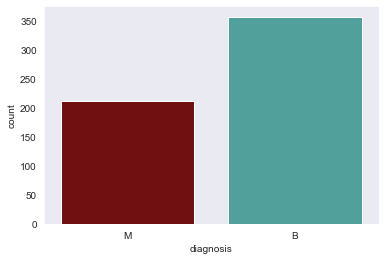

In [2]:
breast_data = pd.read_csv('./data/data.csv')
#breast_data = breast_data.drop(['id','Unnamed: 32'],axis=1)

#data visualization + feature selection
diagnoses=sns.countplot(x='diagnosis', data=breast_data)

In [3]:
breast_data['diagnosis'] = breast_data['diagnosis'].replace(['M', 'B'], [1, 0])



# Class count
count_class_0, count_class_1 = breast_data.diagnosis.value_counts()
print(count_class_0)
print(count_class_1)

# Divide by class
df_class_0 = breast_data[breast_data['diagnosis'] == 0]
df_class_1 = breast_data[breast_data['diagnosis'] == 1]




#oversample X_train
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


breast_data = df_test_over 

357
212


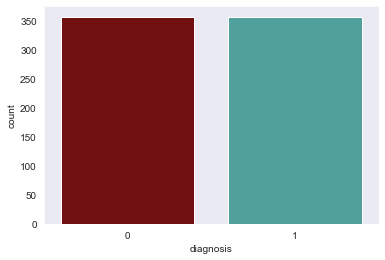

In [4]:
#data visualization + feature selection
diagnoses=sns.countplot(x='diagnosis', data=breast_data)

#drop diagnosis, create X and Y
y = breast_data['diagnosis']
x = breast_data.drop('diagnosis', axis=1)



In [7]:
#replace M and B with 1s and 0s
#y = y.replace(['M', 'B'], [1, 0])
columns = x.columns

x = x.replace(0, np.nan)

#replace missing values with mean
for col in x.columns:
    x[col].fillna(x[col].mean(), inplace=True)

#standardize the dataset to have a mean of 0, allows us to compare different scales
scaler = StandardScaler()
standardized_data = x.copy()

standardized_data[columns] = pd.DataFrame(scaler.fit_transform(standardized_data[columns]))

breast_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [8]:
breast_data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.870088e+07,0.500000,14.936203,19.690616,97.597717,737.336275,0.097460,0.111954,0.104656,0.057337,...,17.393948,26.269888,115.051275,1014.628011,0.134010,0.278211,0.308334,0.127854,0.295099,0.085007
std,1.179638e+08,0.500351,3.851961,4.310033,26.593020,404.540866,0.013980,0.053532,0.084872,0.041642,...,5.332530,6.115358,36.950257,668.138992,0.022822,0.166030,0.212582,0.067881,0.062659,0.018272
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692195e+05,0.000000,12.062500,16.710000,77.892500,448.775000,0.087533,0.070612,0.035480,0.023168,...,13.340000,21.840000,86.845000,546.400000,0.118625,0.161250,0.138175,0.073758,0.253075,0.072280
50%,9.060010e+05,0.500000,14.235000,19.365000,92.615000,626.850000,0.097460,0.104000,0.085930,0.049445,...,16.225000,26.030000,106.400000,803.650000,0.134700,0.233700,0.270200,0.121700,0.285000,0.080825
75%,8.910437e+06,1.000000,17.350000,22.040000,114.200000,933.100000,0.106800,0.144100,0.154700,0.085790,...,20.552500,30.730000,136.100000,1298.750000,0.148200,0.372500,0.442500,0.181225,0.323250,0.093330
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.290300,0.577400,0.207500


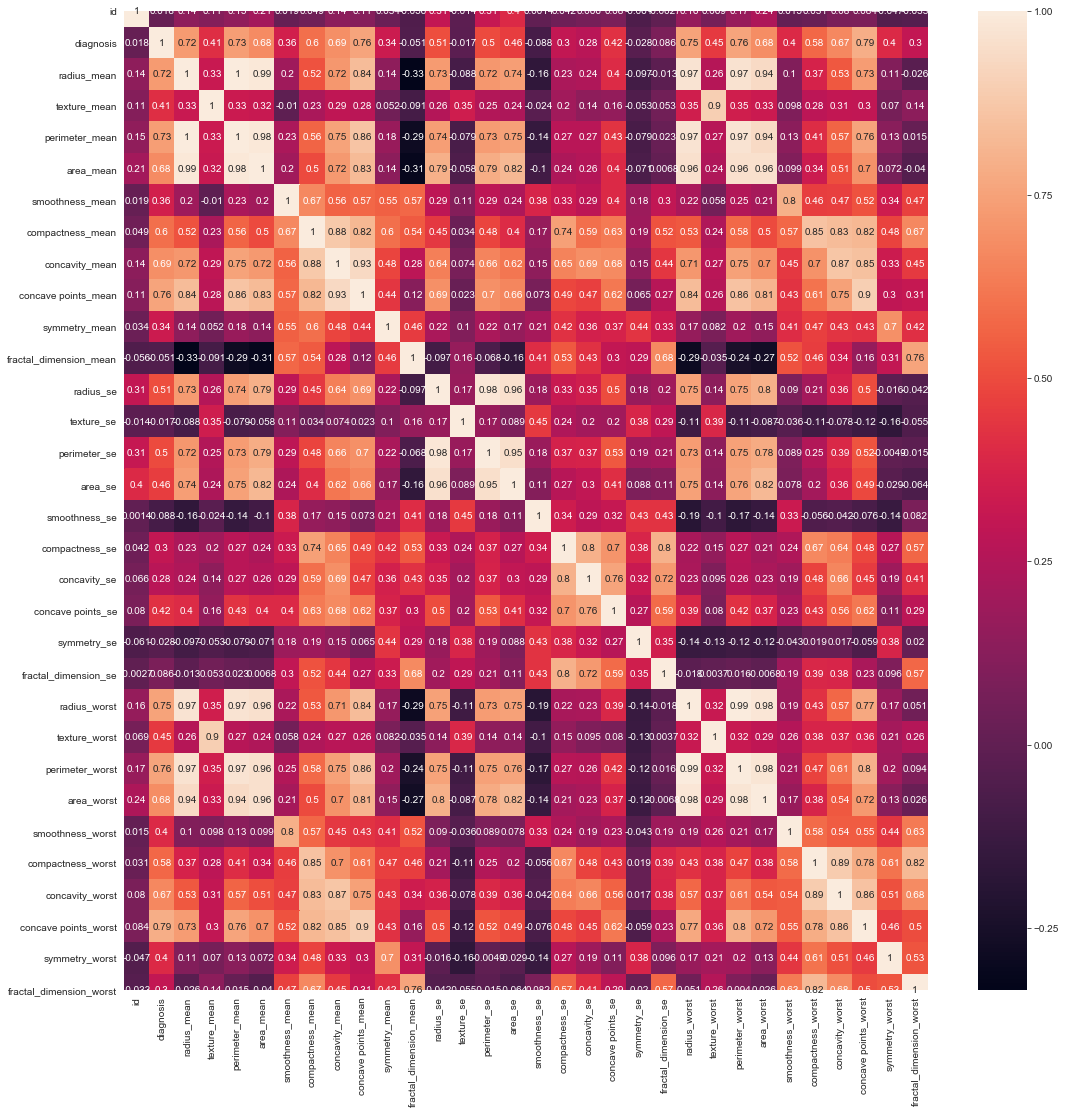

In [9]:
plt.subplots(figsize=(18, 18))
sns.heatmap(breast_data.corr(), annot=True);

In [10]:
#split the dataset, 70% training, 15% test, 15% development

X_train, X_test1, y_train, y_test1 = train_test_split(x, y,test_size=0.3)
X_dev, X_test, y_dev, y_test = train_test_split(X_test1, y_test1,test_size=0.5)

In [11]:
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [12]:
perceptron_model= Perceptron(tol= 1e-3, random_state=0, max_iter=20)
perceptron_model.fit(X_train, y_train)
pre=perceptron_model.predict(X_dev)
metrics.accuracy_score(y_dev,pre)

0.514018691588785

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [14]:
knn= KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
knn.fit(X_train,y_train)
pre=knn.predict(X_dev)
metrics.accuracy_score(y_dev, pre)

0.6542056074766355

In [15]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [16]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_train, y_train)
pre=ada.predict(X_dev)
metrics.accuracy_score(y_dev,pre)

0.514018691588785

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

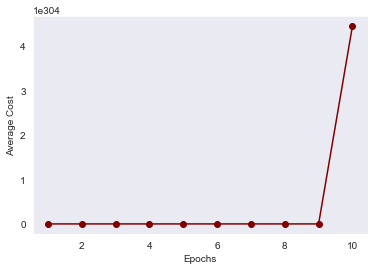

In [17]:
from matplotlib import pyplot as plot
plot.plot(range(1,len(ada.cost_)+1), ada.cost_, marker="o")
plot.xlabel('Epochs')
plot.ylabel('Average Cost')
plot.tight_layout

In [31]:
from sklearn.linear_model import SGDClassifier
adaline= SGDClassifier(n_iter_no_change=10)
adaline.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=10, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
pre=adaline.predict(X_dev)
metrics.accuracy_score(y_dev,pre)

0.48598130841121495

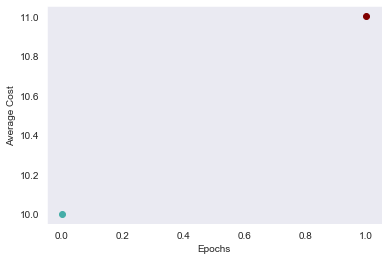

In [33]:
from matplotlib import pyplot as plot
plot.plot(1, adaline.n_iter_no_change+1, adaline.n_iter_no_change, marker='o')
plot.xlabel('Epochs')
plot.ylabel('Average Cost')
plot.tight_layout
plot.show()